## VERIFICAR QUAIS ARQUIVOS SERÃO ESSENCIAIS PARA RESPONDER A QUESTÃO:
- Para abrir um e-commerce de um produto x estamos analisando o ticket médio de compra das pessoas e qual região do brasil
- compra mais de comercios digitais. A justificativa desta investigação é que iremos direcionar nossas propagandas patrocinadas
- para a região que - primeiramente compra mais do mercado digital; em segundo, possui ticket médio adequado ao nosso produto: saúde, beleza, cosméticos


### quais tabelas serão utilizadas?

'''
1. olist_customers_dataset.csv --> costumer_id, customer_zip_code_prefix
2. olist_geolocation_dataset.csv --> zip_code_prefix
3. olist_order_items_dataset.csv --> order_id, product_id
4. olist_products_dataset.csv --> product_id
5. product_category_name_translation.csv --> utilizado apenas para verificar o ranking do nosso produto (a escolher)
'''


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
df_customers = pd.read_csv('arquivos csv/olist_customers_dataset.csv')
#df_geolocation = pd.read_csv('arquivos csv/olist_geolocation_dataset.csv')
df_items = pd.read_csv('arquivos csv/olist_order_items_dataset.csv')
df_payments = pd.read_csv('arquivos csv/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('arquivos csv/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('arquivos csv/olist_orders_dataset.csv')
df_products = pd.read_csv('arquivos csv/olist_products_dataset.csv')
df_sellers = pd.read_csv('arquivos csv/olist_sellers_dataset.csv')
df_category = pd.read_csv('arquivos csv/product_category_name_translation.csv')

In [9]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# cruzando os dados do df_customers com os dados df_geolocation
#df_customers_geo = pd.merge(df_customers, df_geolocation, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')

In [10]:
# juntando as tabelas necessárias para a análise proposta
df_customers_order = pd.merge(df_customers, df_orders, how='inner', on='customer_id')
df_customer_item = pd.merge(df_customers_order, df_items, how='inner', on='order_id')
df_customer_final = pd.merge(df_customer_item, df_products, how='inner', on='product_id')


In [11]:
df_customer_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [134]:
# verificar colunas no total
df_customer_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
df_customer_final[['order_purchase_timestamp']].head()

In [13]:
############################################################################################
'''
Extrair colunas necessárias:
1. customer_id
2. customer_unique_id
3. customer_city
4. customer_state
5. order_id
6. product_id
7. product_category_name
8. price
'''
############################################################################################

'\nExtrair colunas necessárias:\n1. customer_id\n2. customer_unique_id\n3. customer_city\n4. customer_state\n5. order_id\n6. product_id\n7. product_category_name\n8. price\n'

In [14]:
# criar novo dataframe dropando as colunas desnecessárias
data_ecommerce = pd.DataFrame ({
    'customer_id': df_customer_final['customer_id'],
    'customer_unique_id': df_customer_final['customer_unique_id'],
    'customer_city': df_customer_final['customer_city'],
    'customer_state': df_customer_final['customer_state'],
    'order_id': df_customer_final['order_id'],
    'product_id': df_customer_final['product_id'],
    'product_category_name': df_customer_final['product_category_name'],
    'price': df_customer_final['price']
})

In [16]:
#
data_ecommerce.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,product_id,product_category_name,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,106.99


In [ ]:
# Convertendo para parquet e realizando a leitura

In [22]:
data_ecommerce.to_parquet('data_ecommerce.parquet')

In [25]:
data_ecommerce_parquet = pd.read_parquet('data_ecommerce.parquet')

In [31]:
# ajustar para formato de dataframe
data_ecommerce_parquet = pd.DataFrame(data_ecommerce_parquet)
data_ecommerce_parquet.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,product_id,product_category_name,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,112.99
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,124.99
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,106.99


In [135]:
data_ecommerce_parquet.dtypes

customer_id               object
customer_unique_id        object
customer_city             object
customer_state            object
order_id                  object
product_id                object
product_category_name     object
price                    float64
dtype: object

In [34]:
data_ecommerce_parquet.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_city               0
customer_state              0
order_id                    0
product_id                  0
product_category_name    1603
price                       0
dtype: int64

In [36]:
# verificando qual categoria vende mais
data_ecommerce_parquet['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
la_cuisine                          14
cds_dvds_musicais                   14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 73, dtype: int64

In [38]:
data_ecommerce_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            112650 non-null  object 
 1   customer_unique_id     112650 non-null  object 
 2   customer_city          112650 non-null  object 
 3   customer_state         112650 non-null  object 
 4   order_id               112650 non-null  object 
 5   product_id             112650 non-null  object 
 6   product_category_name  111047 non-null  object 
 7   price                  112650 non-null  float64
dtypes: float64(1), object(7)
memory usage: 6.9+ MB


In [137]:
ticket_medio = data_ecommerce_parquet.groupby(['customer_state']).agg({'price': 'mean'}).reset_index()


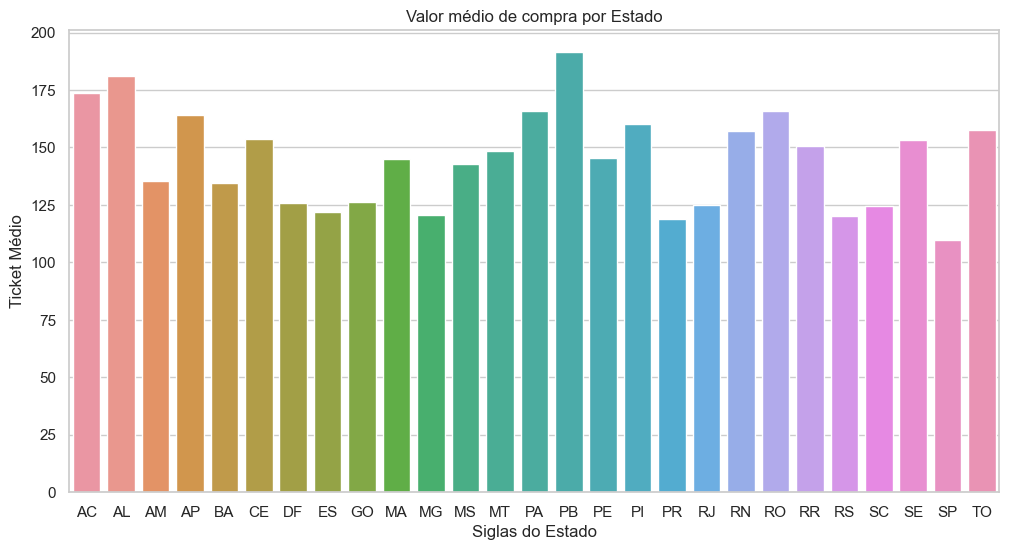

In [138]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='price', data=ticket_medio)
plt.title('Valor médio de compra por Estado')
plt.xlabel('Siglas do Estado')
plt.ylabel('Ticket Médio')
plt.show()


In [179]:
# número de compras por estado
comprasestado = data_ecommerce_parquet.groupby('customer_state')['order_id'].count().reset_index()
comprasestado.rename(columns={'order_id': 'Número de Compras'}, inplace=True)
comprasestado = comprasestado.sort_values('Número de Compras', ascending=False)
print(comprasestado)


   customer_state  Número de Compras
25             SP              47449
18             RJ              14579
10             MG              13129
22             RS               6235
17             PR               5740
23             SC               4176
4              BA               3799
6              DF               2406
8              GO               2333
7              ES               2256
15             PE               1806
5              CE               1478
13             PA               1080
12             MT               1055
9              MA                824
11             MS                819
14             PB                602
16             PI                542
19             RN                529
1              AL                444
24             SE                385
26             TO                315
20             RO                278
2              AM                165
0              AC                 92
3              AP                 82
2

In [180]:
produtosestado = data_ecommerce_parquet.groupby(['customer_state', 'product_category_name'])['product_id'].count().reset_index()
produtosestado.rename(columns={'product_id': 'Número de Produtos Vendidos'}, inplace=True)
print(produtosestado)


     customer_state        product_category_name  Número de Produtos Vendidos
0                AC             artigos_de_natal                            1
1                AC                   automotivo                            4
2                AC                        bebes                            3
3                AC                 beleza_saude                            7
4                AC                   brinquedos                            3
...             ...                          ...                          ...
1363             TO  portateis_casa_forno_e_cafe                            1
1364             TO           relogios_presentes                           30
1365             TO                    telefonia                           21
1366             TO               telefonia_fixa                            2
1367             TO        utilidades_domesticas                           14

[1368 rows x 3 columns]


In [183]:
# acumular somente os 5 primeiros estados que mais consomem
top_produtos = produtosestado.groupby('product_category_name')['Número de Produtos Vendidos'].sum().reset_index()
top_produtos = top_produtos.sort_values(by='Número de Produtos Vendidos', ascending=False).head(5)
produtos_top10 = produtosestado[produtosestado['product_category_name'].isin(top_produtos['product_category_name'])]

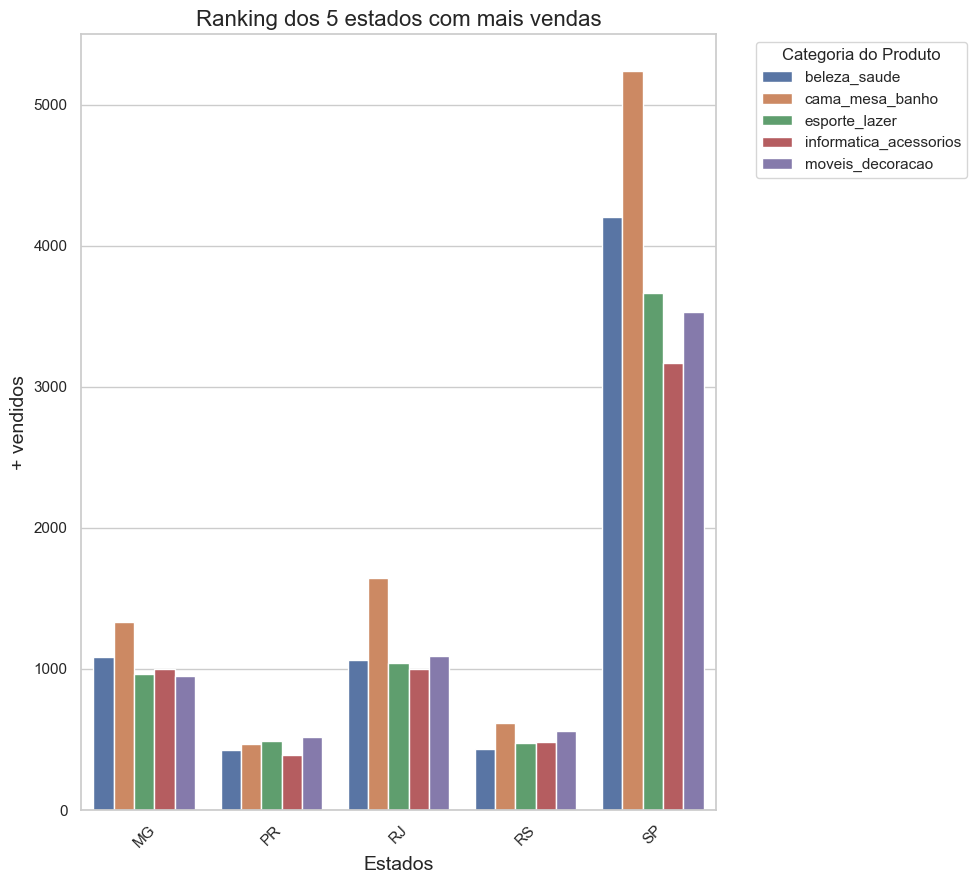

In [184]:
# Agrupar e somar as vendas por estado e selecionar o top 5
comprasestado = produtosestado.groupby('customer_state')['Número de Produtos Vendidos'].sum().reset_index()
top_estados = comprasestado.sort_values(by='Número de Produtos Vendidos', ascending=False).head(5)

# DataFrame para incluir apenas estados e as categorias 
produtos_top10 = produtosestado[
    (produtosestado['customer_state'].isin(top_estados['customer_state'])) & 
    (produtosestado['product_category_name'].isin(top_produtos['product_category_name']))
]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 9))
sns.barplot(data=produtos_top10, x='customer_state', y='Número de Produtos Vendidos', hue='product_category_name')
plt.title('Ranking dos 5 estados com mais vendas', fontsize=16)
plt.xlabel('Estados', fontsize=14)
plt.ylabel('+ vendidos', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
